In [1]:
import pandas as pd


df_encadrement = pd.read_csv("../../data/logement-encadrement-des-loyers.csv", sep=";")

df_quartier = pd.read_csv("../../data/quartier_paris.csv", sep=";")

df_loyer = pd.read_csv("../../data/LoyersFinal.csv", sep=",")

df_immeuble_protege = pd.read_csv("../../data/immeuble_protege.csv", sep=";")

df_encadrement[(df_encadrement['Numéro du quartier'] == 14) 
               & (df_encadrement['Année'] == 2024) 
               & (df_encadrement['Type de location'] == 'meublé') 
               & (df_encadrement['Epoque de construction'] == 'Avant 1946') 
               & (df_encadrement['Nombre de pièces principales'] == 1)]['Loyers de référence majorés'].values[0] * 25

C:\Users\celva\AppData\Local\Temp\ipykernel_5240\437679479.py:10: DtypeWarning: Columns (15,16,23,26,34,35,42,43,53,55,59,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df_immeuble_protege = pd.read_csv("../../data/immeuble_protege.csv", sep=";")


1125.0

In [2]:
df_encadrement['Loyers de référence majorés'].describe()

count    15360.000000
mean        31.388777
std          5.136258
min         17.160000
25%         27.840000
50%         31.080000
75%         34.600000
max         48.800000
Name: Loyers de référence majorés, dtype: float64

In [5]:
df_encadrement

,Année,Secteurs géographiques,Numéro du quartier,Nom du quartier,Nombre de pièces principales,Epoque de construction,Type de location,Loyers de référence,Loyers de référence majorés,Loyers de référence minorés,Ville,Numéro INSEE du quartier,geo_shape,geo_point_2d
0,2022,13,80,Charonne,1,Apres 1990,non meublé,23.4,28.08,16.38,PARIS,7512080,"{""coordinates"": [[[2.4160210576126833, 48.8467...","48.854760283035255, 2.407430328235969"
1,2022,2,16,Notre-Dame,3,1971-1990,non meublé,23.3,27.96,16.31,PARIS,7510416,"{""coordinates"": [[[2.3613137013391388, 48.8485...","48.852895586218004, 2.3527750121216795"
2,2022,11,41,Folie-Méricourt,1,Avant 1946,non meublé,28.8,34.56,20.16,PARIS,7511141,"{""coordinates"": [[[2.370102644458916, 48.86376...","48.86740319007272, 2.3729648249267643"
3,2022,7,61,Auteuil,3,Avant 1946,meublé,26.7,32.04,18.69,PARIS,7511661,"{""coordinates"": [[[2.249224929777844, 48.85782...","48.850622342726865, 2.252276907538065"
4,2022,9,46,Picpus,2,1971-1990,meublé,25.7,30.84,17.99,PARIS,7511246,"{""coordinates"": [[[2.4112497331364517, 48.8296...","48.830359242366505, 2.428826815083849"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15355,2021,2,1,St-Germain-l'Auxerrois,3,1971-1990,non meublé,23.1,27.72,16.17,PARIS,7510101,"{""coordinates"": [[[2.344593389828429, 48.85404...","48.86065013520993, 2.3349103292801994"
15356,2022,4,14,Saint-Gervais,2,Avant 1946,meublé,31.8,38.16,22.26,PARIS,7510414,"{""coordinates"": [[[2.363764600226478, 48.85567...","48.85571865089275, 2.358162333852766"
15357,2022,2,15,Arsenal,4,1971-1990,non meublé,22.6,27.12,15.82,PARIS,7510415,"{""coordinates"": [[[2.3685123713934337, 48.8557...","48.851585175021285, 2.3647679538731117"
15358,2022,3,32,Europe,3,1971-1990,meublé,29.0,34.80,20.30,PARIS,7510832,"{""coordinates"": [[[2.3122934012325604, 48.8733...","48.87814767585099, 2.3171746113048903"


In [11]:
print(df_encadrement[(df_encadrement['Type de location'] == 'meublé') & (df_encadrement['Année'] == 2024)]['Loyers de référence majorés'].describe())
print(df_encadrement[(df_encadrement['Type de location'] == 'non meublé') & (df_encadrement['Année'] == 2024)]['Loyers de référence majorés'].describe())

count    1280.000000
mean       34.647656
std         5.157685
min        19.900000
25%        31.100000
50%        34.100000
75%        38.300000
max        48.800000
Name: Loyers de référence majorés, dtype: float64
count    1280.000000
mean       30.391953
std         4.520597
min        17.500000
25%        27.200000
50%        29.900000
75%        33.600000
max        42.800000
Name: Loyers de référence majorés, dtype: float64


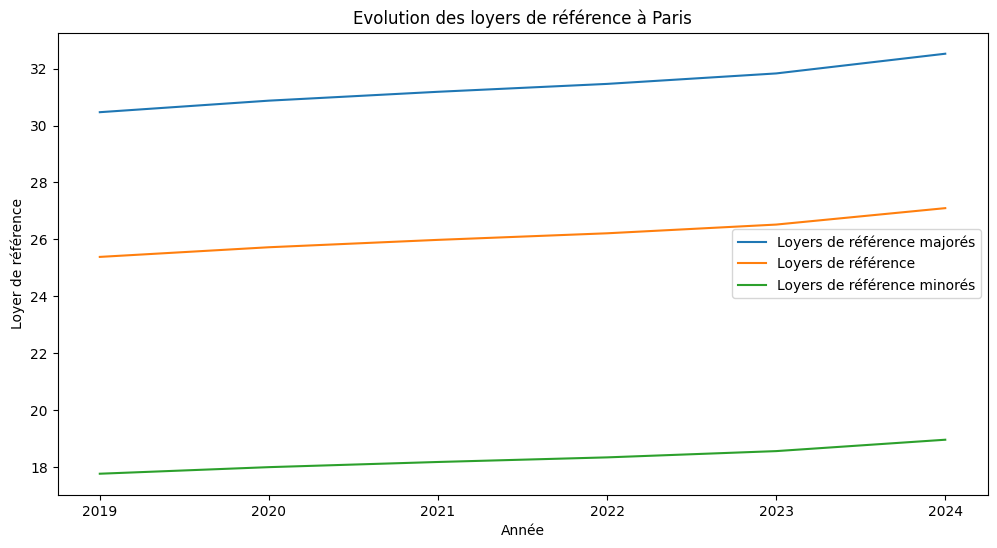

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
df_grp_annee = df_encadrement.groupby('Année').agg({'Loyers de référence majorés': 'mean', 'Loyers de référence': 'mean', 'Loyers de référence minorés': 'mean'}).reset_index()
df_grp_annee['Loyers de référence majorés'] = df_grp_annee['Loyers de référence majorés'].astype(float)
df_grp_annee['Loyers de référence'] = df_grp_annee['Loyers de référence'].astype(float)
df_grp_annee['Loyers de référence minorés'] = df_grp_annee['Loyers de référence minorés'].astype(float)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grp_annee, x='Année', y='Loyers de référence majorés', label='Loyers de référence majorés')
sns.lineplot(data=df_grp_annee, x='Année', y='Loyers de référence', label='Loyers de référence')
sns.lineplot(data=df_grp_annee, x='Année', y='Loyers de référence minorés', label='Loyers de référence minorés')
plt.title('Evolution des loyers de référence à Paris')
plt.xlabel('Année')
plt.ylabel('Loyer de référence')
plt.legend()
plt.show()


In [4]:
df_encadrement['Loyers de référence majorés'].describe()

count    15360.000000
mean        31.388777
std          5.136258
min         17.160000
25%         27.840000
50%         31.080000
75%         34.600000
max         48.800000
Name: Loyers de référence majorés, dtype: float64

In [5]:
df_encadrement['Epoque de construction'].unique()

array(['Apres 1990', '1971-1990', 'Avant 1946', '1946-1970'], dtype=object)

https://fr.wikipedia.org/wiki/Liste_des_quartiers_administratifs_de_Paris#:~:text=Les%2080%20quartiers%20administratifs%20constituent,l'administration%20publique%20%C3%A0%20Paris

Les Numéro des quartiers de Paris sont de 1 à 80. Les quartiers sont regroupés en 20 arrondissements, chaque arrondissement étant divisé en quatre quartiers administratifs.

In [4]:
set(df_quartier['C_QU'].values) == set(df_encadrement['Numéro du quartier'].values)

True

In [9]:
df_encadrement['Epoque de construction'].unique()

array(['Apres 1990', '1971-1990', 'Avant 1946', '1946-1970'], dtype=object)

In [6]:
df_immeuble_protege.columns

Index(['Reference', 'Destination_actuelle_de_l_edifice', 'Adresse_forme_index',
       'Etablissement_affectataire_de_l_edifice',
       'Autre_appellation_de_l_edifice', 'Nature_de_la_protection',
       'Auteur_de_l_edifice', 'Cadastre', 'Commune_forme_index', 'Copyright',
       'Type_de_couverture', 'Datation_de_l_edifice',
       'Denomination_de_l_edifice',
       'Lieu_de_conservation_d_un_element_architectural_deplace',
       'Description_de_l_edifice',
       'Dimensions_normalisees_des_edicules_uniquement', 'Date_de_Label',
       'Date_de_la_derniere_mise_a_jour', 'Date_de_creation_de_la_notice',
       'Domaine', 'Typologie_du_dossier', 'Date_et_typologie_de_la_protection',
       'Departement_format_numerique', 'Partie_d_elevation_exterieure',
       'Source_de_l_energie_utilisee_par_l_edifice',
       'Emplacement__forme_et_structure_de_l_escalier',
       'Description_de_l_elevation_interieure', 'etat_de_conservation',
       'Cadre_de_l_etude', 'Genre_du_destinataire',

In [13]:
df_immeuble_protege['Datation_de_l_edifice'].unique()

array(['1593', nan, '1869', ..., '1558;1666', '1690;1750;1850',
       '1760;1774'], dtype=object)

In [12]:
df_immeuble_protege['coordonnees_au_format_WGS84'].values[0]

'46.6359951707038, 4.86068879863782'

In [23]:
df_immeuble_protege[(~df_immeuble_protege['Departement_format_numerique'].isna()) & (df_immeuble_protege['Departement_format_numerique'] == '75')]

,Reference,Destination_actuelle_de_l_edifice,Adresse_forme_index,Etablissement_affectataire_de_l_edifice,Autre_appellation_de_l_edifice,Nature_de_la_protection,Auteur_de_l_edifice,Cadastre,Commune_forme_index,Copyright,...,Statut_juridique_de_l_edifice,Technique_du_decor_porte_de_l_edifice,Titre_editorial_de_la_notice,Materiaux_de_la_couverture,Couverts_ou_decouverts_du_jardin_de_l_edifice,Vocable___pour_les_edifices_cultuels,Typologie_du_couvrement,Adresse_forme_editoriale,Commune_forme_editoriale,coordonnees_au_format_WGS84
194,PA00085818,NaN,Vendôme (place) 8,NaN,NaN,arrêté,NaN,NaN,Paris 1er Arrondissement,"© Monuments historiques, 1992. Cette notice re...",...,propriété d'une société privée,NaN,Ancien hôtel Delpech de Chaunot,NaN,NaN,NaN,NaN,8 place Vendôme,Paris 1er Arrondissement,"48.8667304176502, 2.32958213263065"
195,PA00085796,NaN,NaN,NaN,NaN,liste,NaN,NaN,Paris 1er Arrondissement,"© Monuments historiques, 1992. Cette notice re...",...,propriété de la commune,NaN,Eglise Saint-Germain-l'Auxerrois,NaN,NaN,NaN,NaN,NaN,Paris 1er Arrondissement,"48.8595048236164, 2.34134701868177"
196,PA00085788,NaN,Saint-Denis (rue) 91 ; Rambuteau (rue) 79,NaN,NaN,arrêté,RINGUET et fils (maître de l'oeuvre),NaN,Paris 1er Arrondissement,"© Monuments historiques, 1992. Cette notice re...",...,propriété privée,NaN,Café-Bar,NaN,NaN,NaN,NaN,91 rue Saint-Denis ; 79 rue Rambuteau,Paris 1er Arrondissement,"48.8621129294348, 2.34922845562623"
197,PA00085851,restaurant,Beaujolais (rue de) 17,NaN,NaN,arrêté,VIGUET M.L. (maître de l'oeuvre),01 : 03 AV 25,Paris 1er Arrondissement,"© Monuments historiques, 1992. Cette notice re...",...,propriété privée,NaN,"Immeuble en bordure du Palais-Royal, restauran...",NaN,NaN,NaN,NaN,17 rue de Beaujolais,Paris 1er Arrondissement,"48.8661542215449, 2.33789374260237"
200,PA00085837,NaN,Saint-Honoré (rue) 211 ; Rivoli (rue de ) 202,NaN,NaN,arrêté,NaN,NaN,Paris 1er Arrondissement,"© Monuments historiques, 1992. Cette notice re...",...,NaN,NaN,Hôtel Saint-James et d'Albany,NaN,NaN,NaN,NaN,211 rue Saint-Honoré ; 202 rue de Rivoli,Paris 1er Arrondissement,"48.8647735268954, 2.33097146440538"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46300,PA75180004,NaN,Chevalier-de-la-Barre (rue du) 35,NaN,NaN,arrêté,Abadie Paul (architecte);Daumet Honoré (archit...,"2020 BN 23, BP 2 et domaine public non cadastr...",Paris 18e Arrondissement,© Monuments historiques. Cette notice reprend ...,...,propriété de la commune,NaN,"Basilique du Sacré-Coeur, ses annexes et le sq...",NaN,NaN,NaN,NaN,35 rue du Chevalier de la Barre,Paris 18e Arrondissement,"48.88541912477373, 2.3435657636270992"
46308,PA75030005,NaN,République (place de la),NaN,NaN,arrêté,Léopold Morice (sculpteur);Charles Morice (arc...,2021 non cadastré,Paris 3e Arrondissement;Paris 10e Arrondisseme...,© Monuments historiques. Cette notice reprend ...,...,propriété de la commune,NaN,Monument à la République,NaN,NaN,NaN,NaN,Place de la République,Paris 3e Arrondissement;Paris 10e Arrondisseme...,"48.867500292473586, 2.3638161657450225"
46314,PA75090009,bibliothèque,Saint-Georges (place) 27,NaN,NaN,arrêté,Aldrophe Alfred (architecte),AH 63,Paris 9e Arrondissement,© Monuments historiques. Cette notice reprend ...,...,propriété d’une personne morale,sculpture de l'ornemaniste Huber (disparues),"Ancien Hôtel Dosne-Thiers, actuellement biblio...",toit en zinc,jardin placé à l'arrière de la bâtisse,NaN,NaN,27 place Saint-Georges,Paris 9e Arrondissement,"48.878439254154905, 2.3370693886031164"
46414,PA75140021,NaN,Sud-dit-du-Montparnasse (cimetière-du),NaN,NaN,arrêté,Ruprich-Robert Victor Marie Charles (architect...,2023 AL 9,Paris 14e arrondissement,© Monuments historiques. Cette notice reprend ...,...,propriété de la commune,NaN,Tombeau de la famille Constant-Dufeux,NaN,NaN,NaN,NaN,Cimetière du Sud dit du Montparnasse,Paris 14e arrondissement,"48.83735486151722, 2.326633045347325"


In [1]:
#!pip install geopandas
# !pip install fiona
import geopandas as gpd
import fiona

layers = fiona.listlayers("..\..\data\BDT_3-4_GPKG_LAMB93_D075-ED2025-03-15.gpkg")
print(layers)

gdf = gpd.read_file("..\..\data\BDT_3-4_GPKG_LAMB93_D075-ED2025-03-15.gpkg", layer="batiment")

['troncon_de_route', 'route_numerotee_ou_nommee', 'itineraire_autre', 'troncon_de_voie_ferree', 'equipement_de_transport', 'piste_d_aerodrome', 'aerodrome', 'point_de_repere', 'non_communication', 'point_du_reseau', 'voie_ferree_nommee', 'toponymie_transport', 'batiment', 'cimetiere', 'construction_lineaire', 'construction_ponctuelle', 'construction_surfacique', 'reservoir', 'ligne_orographique', 'pylone', 'terrain_de_sport', 'toponymie_bati', 'cours_d_eau', 'troncon_hydrographique', 'bassin_versant_topographique', 'plan_d_eau', 'surface_hydrographique', 'noeud_hydrographique', 'detail_hydrographique', 'toponymie_hydrographie', 'zone_d_habitation', 'lieu_dit_non_habite', 'detail_orographique', 'toponymie_lieux_nommes', 'canalisation', 'ligne_electrique', 'poste_de_transformation', 'zone_d_activite_ou_d_interet', 'toponymie_services_et_activites', 'voie_nommee', 'parc_ou_reserve', 'foret_publique', 'toponymie_zones_reglementees', 'haie', 'zone_de_vegetation', 'arrondissement', 'arrondis

In [2]:
gdf

,cleabs,nature,usage_1,usage_2,construction_legere,etat_de_l_objet,date_creation,date_modification,date_d_apparition,date_de_confirmation,...,materiaux_de_la_toiture,hauteur,altitude_minimale_sol,altitude_minimale_toit,altitude_maximale_toit,altitude_maximale_sol,origine_du_batiment,appariement_fichiers_fonciers,identifiants_rnb,geometry
0,BATIMENT0000000000149777,"Industriel, agricole ou commercial",Indifférencié,None,False,En service,2006-05-22 13:18:11.781,2019-03-15 19:18:06.773,None,NaT,...,None,4.1,42.0,NaN,NaN,NaN,Imagerie aérienne,None,VBJD28VV2558,"MULTIPOLYGON Z (((654579.8 6867073.6 46.1, 654..."
1,BATIMENT0000000000149789,"Industriel, agricole ou commercial",Indifférencié,None,False,En service,2006-05-22 13:18:11.781,2021-08-19 11:30:50.087,None,NaT,...,None,6.5,41.2,NaN,49.1,43.1,Imagerie aérienne,None,BZD7JS81K93Y,"MULTIPOLYGON Z (((654703.1 6867016.3 47.7, 654..."
2,BATIMENT0000000000149817,Indifférenciée,Indifférencié,None,False,En service,2006-05-22 13:18:11.781,2019-02-04 13:53:27.912,None,NaT,...,None,3.2,45.0,NaN,NaN,NaN,Imagerie aérienne,None,E8H2R95141YX,"MULTIPOLYGON Z (((653646.2 6866870.8 48.2, 653..."
3,BATIMENT0000000000149818,Indifférenciée,Résidentiel,None,False,En service,2006-05-22 13:18:11.781,2019-03-15 19:18:06.773,1994/01/01,NaT,...,90,32.1,42.0,NaN,NaN,NaN,Imagerie aérienne,C 0.6,TG9KE7S8YFFH,"MULTIPOLYGON Z (((653258.5 6867043.2 75.3, 653..."
4,BATIMENT0000000000149824,"Industriel, agricole ou commercial",Indifférencié,None,False,En service,2006-05-22 13:18:11.781,2019-03-15 19:18:06.773,2010/01/01,NaT,...,None,5.5,38.0,NaN,NaN,NaN,Imagerie aérienne,C 0.2,YR16YMM3YR1V,"MULTIPOLYGON Z (((652915.6 6867035.5 43.5, 652..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603974,BATIMENT0000002480820072,Indifférenciée,Commercial et services,None,False,En service,2024-12-03 17:40:58.841,NaT,None,NaT,...,None,NaN,NaN,NaN,NaN,NaN,Imagerie aérienne,None,None,"MULTIPOLYGON Z (((644074.5 6858256.7 -1000, 64..."
603975,BATIMENT0000002480820073,Indifférenciée,Commercial et services,None,False,En service,2024-12-03 17:40:58.841,NaT,None,NaT,...,None,NaN,NaN,NaN,NaN,NaN,Imagerie aérienne,None,None,"MULTIPOLYGON Z (((643900.6 6858280.4 -1000, 64..."
603976,BATIMENT0000002480820074,Indifférenciée,Commercial et services,None,False,En service,2024-12-03 17:40:58.841,NaT,None,NaT,...,None,NaN,NaN,NaN,NaN,NaN,Imagerie aérienne,None,None,"MULTIPOLYGON Z (((643952.8 6858370.6 -1000, 64..."
603977,BATIMENT0000002488045589,Indifférenciée,Commercial et services,None,False,En service,2025-01-13 15:23:44.141,NaT,None,NaT,...,None,7.9,36.2,44.1,46.8,39.0,Cadastre,A 0.3,None,"MULTIPOLYGON Z (((662467.9 6855629.6 44, 66246..."


In [19]:
mask = (df_encadrement['Nom du quartier'] == 'Arts-et-Metiers') & (df_encadrement['Année'] == 2024) & (df_encadrement['Type de location'] == 'meublé') & (df_encadrement['Epoque de construction'] == 'Avant 1946') & (df_encadrement['Nombre de pièces principales'] == 1)

df_encadrement[mask]

,Année,Secteurs géographiques,Numéro du quartier,Nom du quartier,Nombre de pièces principales,Epoque de construction,Type de location,Loyers de référence,Loyers de référence majorés,Loyers de référence minorés,Ville,Numéro INSEE du quartier,geo_shape,geo_point_2d
1485,2024,4,9,Arts-et-Metiers,1,Avant 1946,meublé,37.5,45.0,26.3,PARIS,7510309,"{""coordinates"": [[[2.3602099795474456, 48.8651...","48.86647028948414, 2.3570831310567835"
